In [1]:
#Import Libraries
import numpy as np
import pandas as pd
import sklearn as skl
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Import Data
EcoFootprint = pd.read_csv('../Final Project/Data/EcoFootprint.csv')
QualityOfLife = pd.read_csv('../Final Project/Data/QualityOfLife.csv')
QualityOfLife = QualityOfLife.iloc[:,1:]
MineralOres = pd.read_csv('../Final Project/Data/WorldMineralProduction.csv')
MineralOres = MineralOres.iloc[:,:7]

In [3]:
EcoFootprint.head()

,Country,Region,Population (millions),HDI,GDP per Capita,Cropland Footprint,Grazing Footprint,Forest Footprint,Carbon Footprint,Fish Footprint,...,Cropland,Grazing Land,Forest Land,Fishing Water,Urban Land,Total Biocapacity,Biocapacity Deficit or Reserve,Earths Required,Countries Required,Data Quality
0,Afghanistan,Middle East/Central Asia,29.82,0.46,$614.66,0.30,0.20,0.08,0.18,0.00,...,0.24,0.20,0.02,0.00,0.04,0.50,-0.30,0.46,1.60,6
1,Albania,Northern/Eastern Europe,3.16,0.73,"$4,534.37",0.78,0.22,0.25,0.87,0.02,...,0.55,0.21,0.29,0.07,0.06,1.18,-1.03,1.27,1.87,6
2,Algeria,Africa,38.48,0.73,"$5,430.57",0.60,0.16,0.17,1.14,0.01,...,0.24,0.27,0.03,0.01,0.03,0.59,-1.53,1.22,3.61,5
3,Angola,Africa,20.82,0.52,"$4,665.91",0.33,0.15,0.12,0.20,0.09,...,0.20,1.42,0.64,0.26,0.04,2.55,1.61,0.54,0.37,6
4,Antigua and Barbuda,Latin America,0.09,0.78,"$13,205.10",NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.94,-4.44,3.11,5.70,2


In [4]:
QualityOfLife.head()

,Rank,Country,Stability(15%),Rights(20%),Health(15%),Safety(10%),Climate(15%),Costs(15%),Popularity(10%),TotalQuality of life(100%)
0,1,Australia,86,92,87,100,90,23,41,76
1,2,San Marino,81,82,91,87,62,61,47,74
2,3,Hong Kong,77,85,100,97,49,61,41,74
3,4,Switzerland,91,99,93,99,34,44,46,74
4,5,Macao,90,71,100,93,48,61,44,73


In [5]:
MineralOres.head()

,Country,Total (incl. Bauxite),Iron and Ferro-Alloy Metals,Non-Ferrous Metals,Precious Metals (t),Industrial Minerals (incl. Diam.),Mineral Fuels
0,China,5038785218,217290602,48477058,3853,173531300,4525182405
1,United States,2316410664,24939600,3246107,1196,91403393,2196807788
2,Russia,1612152492,56586173,5503754,1892,37905716,1505442957
3,Australia,1321311762,588202029,4196538,1472,19547182,608886187
4,India,1244257269,161046850,5163943,715,59923467,994290588


In [6]:
def get_unique_countries(df1, df2, df3, column_name='Country'):
    # Extract sets of unique countries from each DataFrame
    countries_df1 = set(df1[column_name])
    countries_df2 = set(df2[column_name])
    countries_df3 = set(df3[column_name])

    # Find countries unique to each DataFrame
    unique_to_df1 = countries_df1 - (countries_df2 | countries_df3)
    unique_to_df2 = countries_df2 - (countries_df1 | countries_df3)
    unique_to_df3 = countries_df3 - (countries_df1 | countries_df2)

    # Combine all unique countries
    all_unique_countries = unique_to_df1 | unique_to_df2 | unique_to_df3

    return all_unique_countries

In [7]:
def min_max_normalize(series):
    return (series - series.min()) / (series.max() - series.min()) * 100

In [8]:
print(get_unique_countries(EcoFootprint, QualityOfLife, MineralOres))

{'Macedonia TFYR', 'Sao Tome and Principe', 'Bosnia-Herzegovina', 'Somalia', 'South Sudan', 'Syria', 'Comoros', 'Saint Lucia', 'Solomon Islands', 'Venezuela, Bolivarian Republic of', 'Tanzania, United Republic of', 'Christmas Island', 'United States of America', 'Congo, Rep.', "Côte d'Ivoire", 'Kosovo', 'Korea, Republic of', 'Brunei', 'Turkiye', 'Haiti', 'Viet Nam', 'Brunei Darussalam', 'Venezuela', 'Libya', 'Hong Kong', 'Congo, D.R.', 'Cayman Islands', 'Aruba', 'Maldives', 'Cabo Verde', 'Tonga', 'Korea, North', 'Ivory Coast', 'French Polynesia', 'Libyan Arab Jamahiriya', 'British Virgin Islands', 'Saint Vincent and Grenadines', 'Guadeloupe', 'Syrian Arab Republic', 'Saint Kitts and Nevis', 'Burma', 'San Marino', "Cote d'Ivoire", 'Eswatini', 'Congo, Democratic Republic of', 'Montserrat', 'South Korea', 'Taiwan', 'Antigua and Barbuda', 'Djibouti', 'Martinique', 'Russian Federation', 'Czech Republic', "Lao People's Democratic Republic", "Korea, Democratic People's Republic of", 'Dominica

In [9]:
# Create a mapping dictionary to standardize country names
country_mapping = {
    'USA': 'United States',
    'US': 'United States',
    'United States of America': 'United States',
    'UK': 'United Kingdom',
    'U.K.': 'United Kingdom',
    'Deutschland': 'Germany',
    'Turkey': 'Turkiye',
    'Czech Republic':'Czechia',
    'Congo, D.R.':'D.R.C.',
    'Congo (Dem. Republic)':'D.R.C.',
    'Congo, Democratic Republic of':'D.R.C.',
    'Congo, Rep.': 'Congo',
    'Swaziland':'Eswatini',
    'Korea, North':'North Korea',
    'Korea, Democratic People\'s Republic of':'North Korea',
    'Korea, Republic of':'South Korea',
    'Korea, South':'South Korea',
    'Venezuela, Bolivarian Republic of':'Venezuela',
    'Iran, Islamic Republic of':'Iran',
    'Russian Federation':'Russia',
    'Syrian Arab Republic':'Syria',
    'Viet Nam':'Vietnam',
    'Burma':'Myanmar',
    'Lao People\'s Democratic Republic':'Laos',
    'Tanzania, United Republic of':'Tanzania',
    'Brunei Darussalam':'Brunei',
    'Cabo Verde':'Cape Verde',
    'Libyan Arab Jamahiriya':'Libya'
}

# Apply the mapping to standardize the 'country' column in each DataFrame
EcoFootprint['Country'] = EcoFootprint['Country'].replace(country_mapping)
QualityOfLife['Country'] = QualityOfLife['Country'].replace(country_mapping)
MineralOres['Country'] = MineralOres['Country'].replace(country_mapping)

In [10]:
print(get_unique_countries(EcoFootprint, QualityOfLife, MineralOres))

{'Aruba', 'Maldives', 'Tonga', 'Macedonia TFYR', 'Sao Tome and Principe', 'Ivory Coast', 'French Polynesia', 'Somalia', 'British Virgin Islands', 'Saint Vincent and Grenadines', 'Guadeloupe', 'Bosnia-Herzegovina', 'Saint Kitts and Nevis', "Cote d'Ivoire", 'San Marino', 'South Sudan', 'Comoros', 'Saint Lucia', 'Solomon Islands', 'Christmas Island', 'Montserrat', "Côte d'Ivoire", 'Hong Kong', 'Kosovo', 'Taiwan', 'Antigua and Barbuda', 'Djibouti', 'Haiti', 'Martinique', 'Dominica', 'Wallis and Futuna Islands', 'Grenada', 'Réunion', 'Guinea-Bissau', 'Macao', 'Cayman Islands'}


In [11]:
merged_df = pd.merge(EcoFootprint, MineralOres, on='Country', how='inner')
merged_df = pd.merge(merged_df, QualityOfLife, on='Country', how='inner')

In [12]:
merged_df['Total Minerals'] = merged_df['Total (incl. Bauxite)']
merged_df['Population'] = merged_df['Population (millions)']
merged_df['Stability'] = merged_df['Stability(15%)']
merged_df['Rights'] = merged_df['Rights(20%)']
merged_df['Health'] = merged_df['Health(15%)']
merged_df['Safety'] = merged_df['Safety(10%)']
merged_df['Climate'] = merged_df['Climate(15%)']
merged_df['Costs'] = merged_df['Costs(15%)']
merged_df['Popularity'] = merged_df['Popularity(10%)']
merged_df['TotalQuality of life'] = merged_df['TotalQuality of life(100%)']
merged_df['Precious Metals'] = merged_df['Precious Metals (t)']
merged_df['Industrial Minerals'] = merged_df['Industrial Minerals (incl. Diam.)']
merged_df['Quality of life'] = merged_df['TotalQuality of life']

merged_df['GDP per Capita'] = merged_df['GDP per Capita'].str.replace('$', '', regex=False).str.replace(',', '', regex=False)
merged_df['GDP per Capita'] = pd.to_numeric(merged_df['GDP per Capita'])

merged_df = merged_df.loc[:, ['Country','Population','HDI','GDP per Capita','Cropland Footprint','Fish Footprint','Total Ecological Footprint','Cropland','Grazing Land','Forest Land','Fishing Water','Urban Land','Total Biocapacity','Biocapacity Deficit or Reserve','Earths Required','Total Minerals','Iron and Ferro-Alloy Metals','Non-Ferrous Metals','Precious Metals','Industrial Minerals','Mineral Fuels','Stability','Rights','Health','Safety','Climate','Costs','Popularity','Quality of life']] 

In [13]:
merged_df.head()

,Country,Population,HDI,GDP per Capita,Cropland Footprint,Fish Footprint,Total Ecological Footprint,Cropland,Grazing Land,Forest Land,...,Industrial Minerals,Mineral Fuels,Stability,Rights,Health,Safety,Climate,Costs,Popularity,Quality of life
0,Afghanistan,29.82,0.46,614.66,0.30,0.00,0.79,0.24,0.20,0.02,...,462375,665000,28,9,20,19,58,63,63,35
1,Albania,3.16,0.73,4534.37,0.78,0.02,2.21,0.55,0.21,0.29,...,108239,880282,58,43,64,84,55,57,26,55
2,Algeria,38.48,0.73,5430.57,0.60,0.01,2.12,0.24,0.27,0.03,...,3647500,143214800,35,24,61,97,78,55,36,52
3,Angola,20.82,0.52,4665.91,0.33,0.09,0.93,0.20,1.42,0.64,...,480372,61024280,27,24,10,55,63,53,31,36
4,Argentina,41.09,0.83,13540.00,0.78,0.10,3.14,2.64,1.86,0.66,...,1937049,62902600,41,44,79,78,77,41,38,56


### At this point, the dataset is ready to use

In [14]:
# Creating two new indicators to see if I can find some relation to explore.
merged_df['Minerals per Capita'] = merged_df['Total Minerals'] / (merged_df['Population'] * 1000000)

merged_df['Minerals GDP Share'] = merged_df['GDP per Capita'] / merged_df['Total Minerals']

#### Display the new dataset

In [15]:
merged_df

,Country,Population,HDI,GDP per Capita,Cropland Footprint,Fish Footprint,Total Ecological Footprint,Cropland,Grazing Land,Forest Land,...,Stability,Rights,Health,Safety,Climate,Costs,Popularity,Quality of life,Minerals per Capita,Minerals GDP Share
0,Afghanistan,29.82,0.46,614.66,0.30,0.00,0.79,0.24,0.20,0.02,...,28,9,20,19,58,63,63,35,0.038447,0.000536
1,Albania,3.16,0.73,4534.37,0.78,0.02,2.21,0.55,0.21,0.29,...,58,43,64,84,55,57,26,55,0.435747,0.003293
2,Algeria,38.48,0.73,5430.57,0.60,0.01,2.12,0.24,0.27,0.03,...,35,24,61,97,78,55,36,52,3.844522,0.000037
3,Angola,20.82,0.52,4665.91,0.33,0.09,0.93,0.20,1.42,0.64,...,27,24,10,55,63,53,31,36,2.955953,0.000076
4,Argentina,41.09,0.83,13540.00,0.78,0.10,3.14,2.64,1.86,0.66,...,41,44,79,78,77,41,38,56,1.588642,0.000207
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114,United States,317.50,0.91,49725.00,1.13,0.12,8.22,1.49,0.28,1.57,...,63,81,71,85,66,37,67,67,7.295782,0.000021
115,Uruguay,3.40,0.79,14238.10,0.19,0.05,2.91,1.89,4.86,1.22,...,67,79,75,82,77,47,30,67,0.007428,0.563751
116,Vietnam,90.80,0.66,1532.31,0.50,0.05,1.65,0.55,0.01,0.17,...,67,35,54,76,52,51,33,52,0.803313,0.000021
117,Zambia,14.08,0.58,1740.64,0.19,0.01,0.99,0.24,0.94,0.99,...,34,32,18,60,68,58,47,44,0.165702,0.000746


#### The first value explores the mineral tonnage exported by a nation per person, the second explores the mathematical comparison of tons of minerals exported dividing into the gdp per capita

#### I also want to normalize the data a little bit to display in a nicer way.

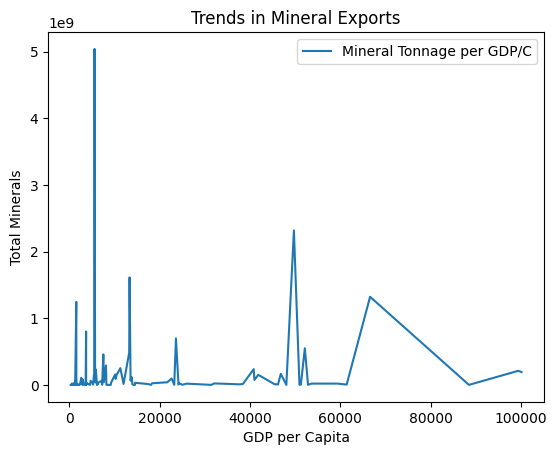

In [16]:
sns.lineplot(data=merged_df, x='GDP per Capita', y='Total Minerals', label='Mineral Tonnage per GDP/C')
plt.title('Trends in Mineral Exports')
plt.legend()
plt.show()

#### There doesn't seem to be much of a correlation here directly, but I'm hoping to see more correlation when compared to other values.

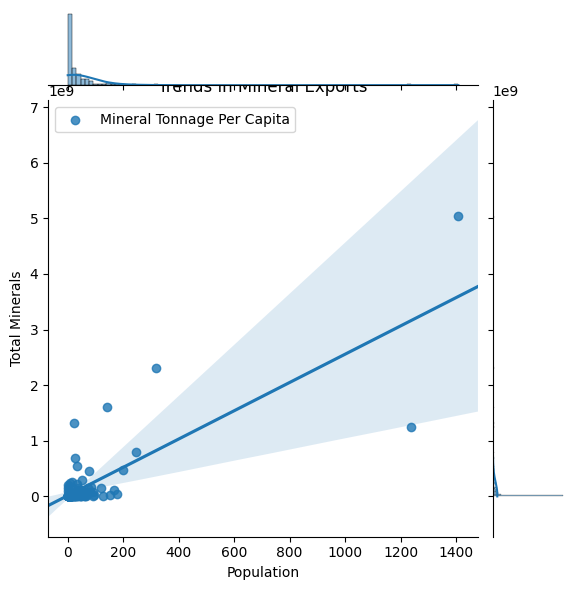

In [17]:
sns.jointplot(data=merged_df, x='Population', y='Total Minerals', label='Mineral Tonnage Per Capita', kind="reg", truncate=False,)
plt.title('Trends in Mineral Exports')
plt.legend()
plt.show()

#### This looks more promising, but there is still quite a loose correlation, which isn't too surprising, but I'm pleased to see at least some sort of relation, which does make logical sense, the mineral needs of larger nations are bound to be higher.

#### Now that I have 2 different values which I believe could be indicators of a nations rate of mineral extraction as well as their reliance on it, I need to put them on a visual representation, along with some indicators of citizen health and happiness

#### An issue with plotting these values, however, is that they are all on different scales, so I want to consider mapping the data onto a consistent scale

In [18]:
# Normalize the required fields to a 0-100 scale
def min_max_normalize(series):
    return (series - series.min()) / (series.max() - series.min()) * 100

comparison_df = pd.DataFrame()

comparison_df['QOL_normalized'] = merged_df['Quality of life']
comparison_df['HDI_normalized'] = min_max_normalize(merged_df['HDI'])
comparison_df['Minerals_per_Capita_normalized'] = min_max_normalize(merged_df['Minerals per Capita'])
comparison_df['Minerals_GDP_Share_normalized'] = min_max_normalize(merged_df['Minerals GDP Share'])

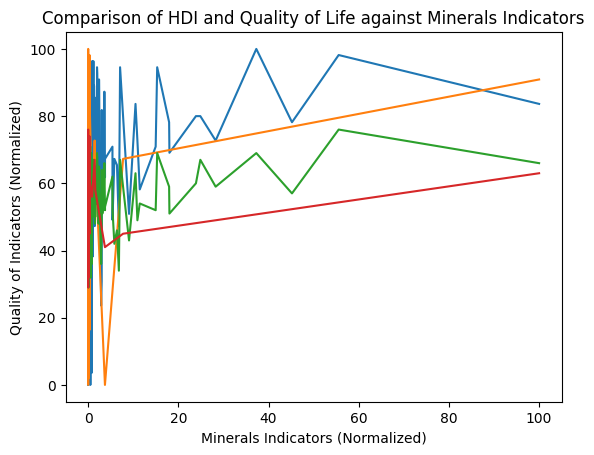

In [19]:
# Plot using seaborn
sns.lineplot(x="Minerals_per_Capita_normalized", y="HDI_normalized",data=comparison_df)
sns.lineplot(x="Minerals_GDP_Share_normalized", y="HDI_normalized",data=comparison_df)
sns.lineplot(x="Minerals_per_Capita_normalized", y="QOL_normalized",data=comparison_df)
sns.lineplot(x="Minerals_GDP_Share_normalized", y="QOL_normalized",data=comparison_df)

plt.title('Comparison of HDI and Quality of Life against Minerals Indicators')
plt.xlabel('Minerals Indicators (Normalized)')
plt.ylabel('Quality of Indicators (Normalized)')
plt.show()

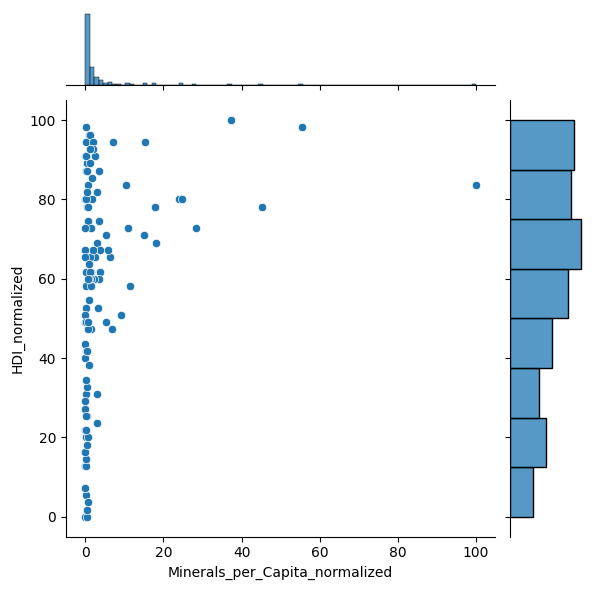

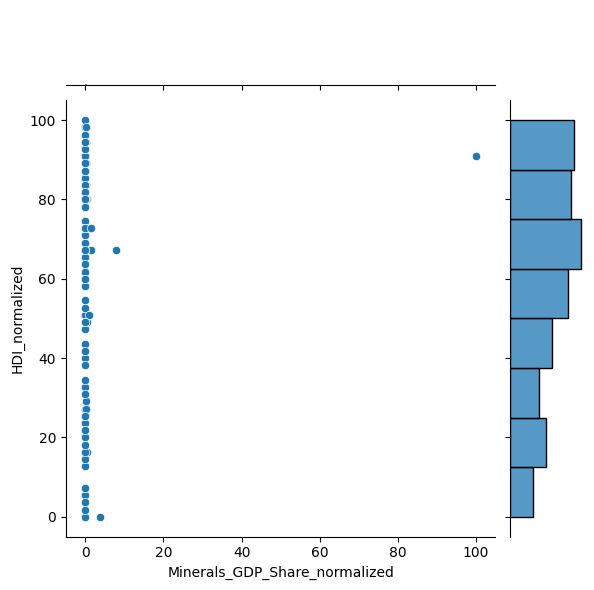

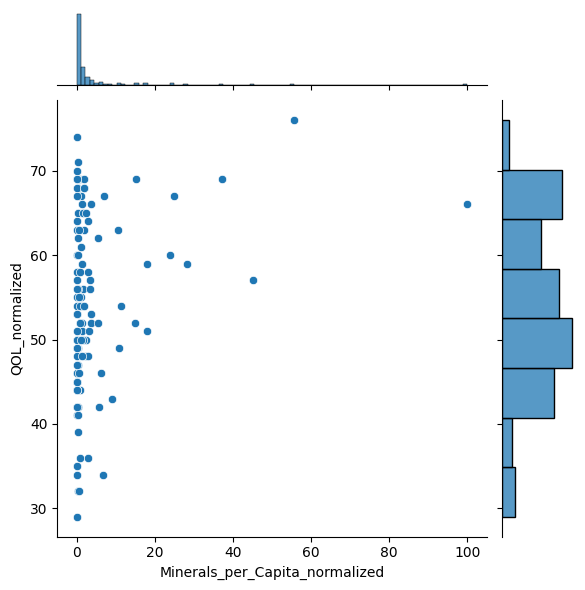

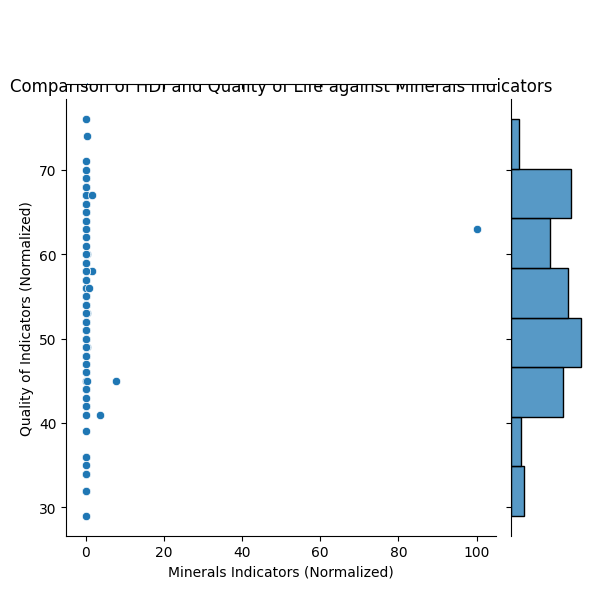

In [20]:
# Plot using seaborn
sns.jointplot(x="Minerals_per_Capita_normalized", y="HDI_normalized",data=comparison_df)
sns.jointplot(x="Minerals_GDP_Share_normalized", y="HDI_normalized",data=comparison_df)
sns.jointplot(x="Minerals_per_Capita_normalized", y="QOL_normalized",data=comparison_df)
sns.jointplot(x="Minerals_GDP_Share_normalized", y="QOL_normalized",data=comparison_df)

plt.title('Comparison of HDI and Quality of Life against Minerals Indicators')
plt.xlabel('Minerals Indicators (Normalized)')
plt.ylabel('Quality of Indicators (Normalized)')
plt.show()